## 아파트 실거래가 로딩
- 시군구를 구, 동으로 분리
- 전용면적 -> 평 - > 평형
- 계약년월 -> 계약년, 계약월 분리
- 계약년월+계약일 -> datetime변환 -> 계약요일 추출
- 칼럼삭제( 본번, 부번 )
- EDA실시(통계, 시각화)
   - 계약년월별 구별 거래건수, 평균거래가격
   - 계약년월별 거래취소건수
   - 구별 거래취소건수
   - 평형별 거래년월별 평균거래가격
   - 구별 평형별 거래년월별 평균거래가격
- 결측치 처리
- 실거래가 회귀분석()

In [1]:
import pandas as pd

apt_price = pd.read_csv(
    'apt_price_2022.csv',
    encoding='cp949',
    skiprows=15,
    thousands=','
)
apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구"
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구


In [2]:
apt_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       16947 non-null  object 
 1   번지        16943 non-null  object 
 2   본번        16946 non-null  float64
 3   부번        16946 non-null  float64
 4   단지명       16947 non-null  object 
 5   전용면적(㎡)   16947 non-null  float64
 6   계약년월      16947 non-null  int64  
 7   계약일       16947 non-null  int64  
 8   거래금액(만원)  16947 non-null  int64  
 9   층         16947 non-null  int64  
 10  건축년도      16945 non-null  float64
 11  도로명       16947 non-null  object 
 12  해제사유발생일   665 non-null    float64
 13  거래유형      16947 non-null  object 
 14  중개사소재지    16947 non-null  object 
dtypes: float64(5), int64(4), object(6)
memory usage: 1.9+ MB


In [3]:
# apt_price['시군구'] 를 시, 구, 동으로 분할
apt_price['구'] = apt_price['시군구'].str.split(' ').str[1]
apt_price['동'] = apt_price['시군구'].str.split(' ').str[2]
# 전용면적을 평 변환
apt_price['평'] = round(apt_price['전용면적(㎡)'] / 3.03,1)
# 거래금액 단위를 억원으로 변환
apt_price['거래금액_억원'] = apt_price['거래금액(만원)'] / 10000
# 계약년월 -> 계약년, 계약월로 분리
apt_price['계약년'] = apt_price['계약년월'] // 100
apt_price['계약월'] = apt_price['계약년월'] % 100
apt_price.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,해제사유발생일,거래유형,중개사소재지,구,동,평,거래금액_억원,계약년,계약월
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,...,언주로 3,NaN,-,-,강남구,개포동,26.4,22.0,2021,9
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,21.5,2021,12
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,22.0,2022,4
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,22.0,2022,4
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,21.6,2022,5


In [4]:
apt_price['평형']=pd.cut(
    apt_price['평'],
    bins=[0,10,20,30,40,50,1000],
    labels='10평이하,10평대,20평대,30평대,40평대,40평이상'.split(',')
)

In [5]:
DOW = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}

apt_price['요일']=pd.to_datetime(
    apt_price['계약년월'].astype(str)+apt_price['계약일'].astype(str),
    format='%Y%m%d'
).dt.dayofweek
apt_price
apt_price.replace({'요일':DOW})

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,거래유형,중개사소재지,구,동,평,거래금액_억원,계약년,계약월,평형,요일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,...,-,-,강남구,개포동,26.4,22.00,2021,9,20평대,목
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,...,중개거래,서울 강남구,강남구,개포동,26.4,21.50,2021,12,20평대,토
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,...,중개거래,서울 강남구,강남구,개포동,26.4,22.00,2022,4,20평대,화
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,...,중개거래,서울 강남구,강남구,개포동,26.4,22.00,2022,4,20평대,목
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,...,중개거래,서울 강남구,강남구,개포동,26.4,21.60,2022,5,20평대,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,...,중개거래,서울 중랑구,중랑구,중화동,19.7,7.40,2022,7,10평대,수
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,...,중개거래,서울 중랑구,중랑구,중화동,27.7,9.15,2022,7,20평대,수
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,...,중개거래,"서울 송파구, 서울 중랑구",중랑구,중화동,28.0,5.00,2021,11,20평대,목
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,...,중개거래,서울 중랑구,중랑구,중화동,28.0,4.99,2022,4,20평대,토


In [6]:
apt_price.drop(['본번','부번'],axis=1,inplace=True)
apt_price.head()

,시군구,번지,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,...,거래유형,중개사소재지,구,동,평,거래금액_억원,계약년,계약월,평형,요일
0,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,...,-,-,강남구,개포동,26.4,22.0,2021,9,20평대,3
1,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,...,중개거래,서울 강남구,강남구,개포동,26.4,21.5,2021,12,20평대,5
2,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,...,중개거래,서울 강남구,강남구,개포동,26.4,22.0,2022,4,20평대,1
3,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,...,중개거래,서울 강남구,강남구,개포동,26.4,22.0,2022,4,20평대,3
4,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,...,중개거래,서울 강남구,강남구,개포동,26.4,21.6,2022,5,20평대,4


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic")

## 계약년월별 구별 거래건수

In [22]:
apt_price.groupby(["계약년월",'구'])[['층']].count()

층
계약년월   구       
202109 강남구  147
       강동구  125
       강북구   48
       강서구  153
       관악구  109
...         ...
202208 용산구    3
       은평구   19
       종로구    6
       중구     7
       중랑구    8

[300 rows x 1 columns]

<AxesSubplot:xlabel='계약년월,구'>

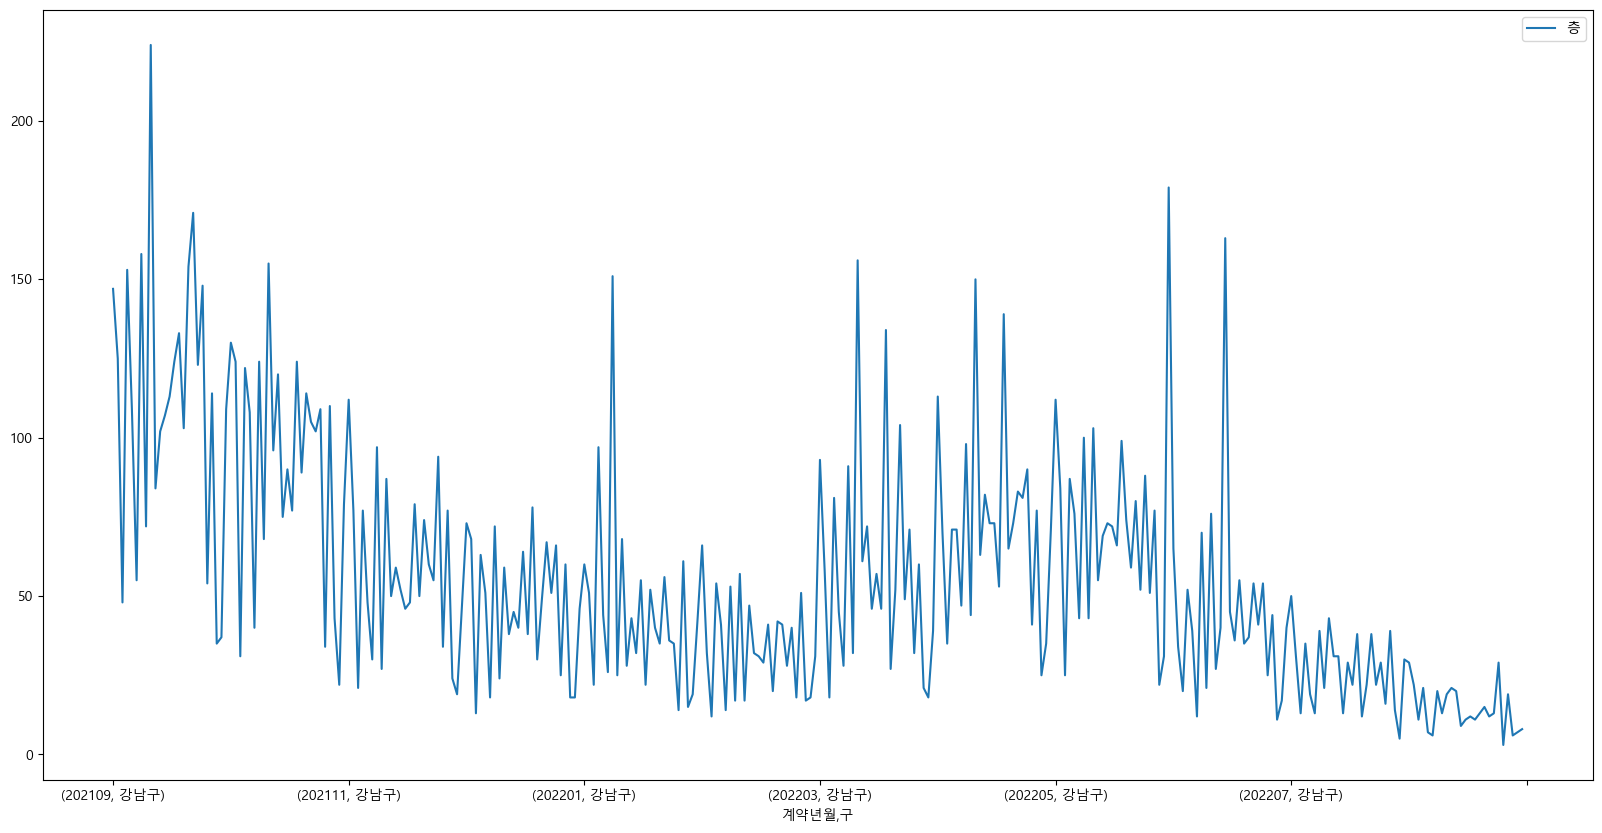

In [35]:
apt_price.groupby(["계약년월",'구'])[['층']].count().plot(figsize=(20,10))

## 계약년월별 구별 평균거래가격

In [24]:
round(apt_price.groupby(["계약년월",'구'])[['거래금액_억원']].mean(),2)

거래금액_억원
계약년월   구           
202109 강남구    20.90
       강동구    10.93
       강북구     7.53
       강서구     8.36
       관악구     7.87
...             ...
202208 용산구     9.30
       은평구     4.60
       종로구     2.07
       중구     12.56
       중랑구     5.22

[300 rows x 1 columns]

<AxesSubplot:xlabel='계약년월,구'>

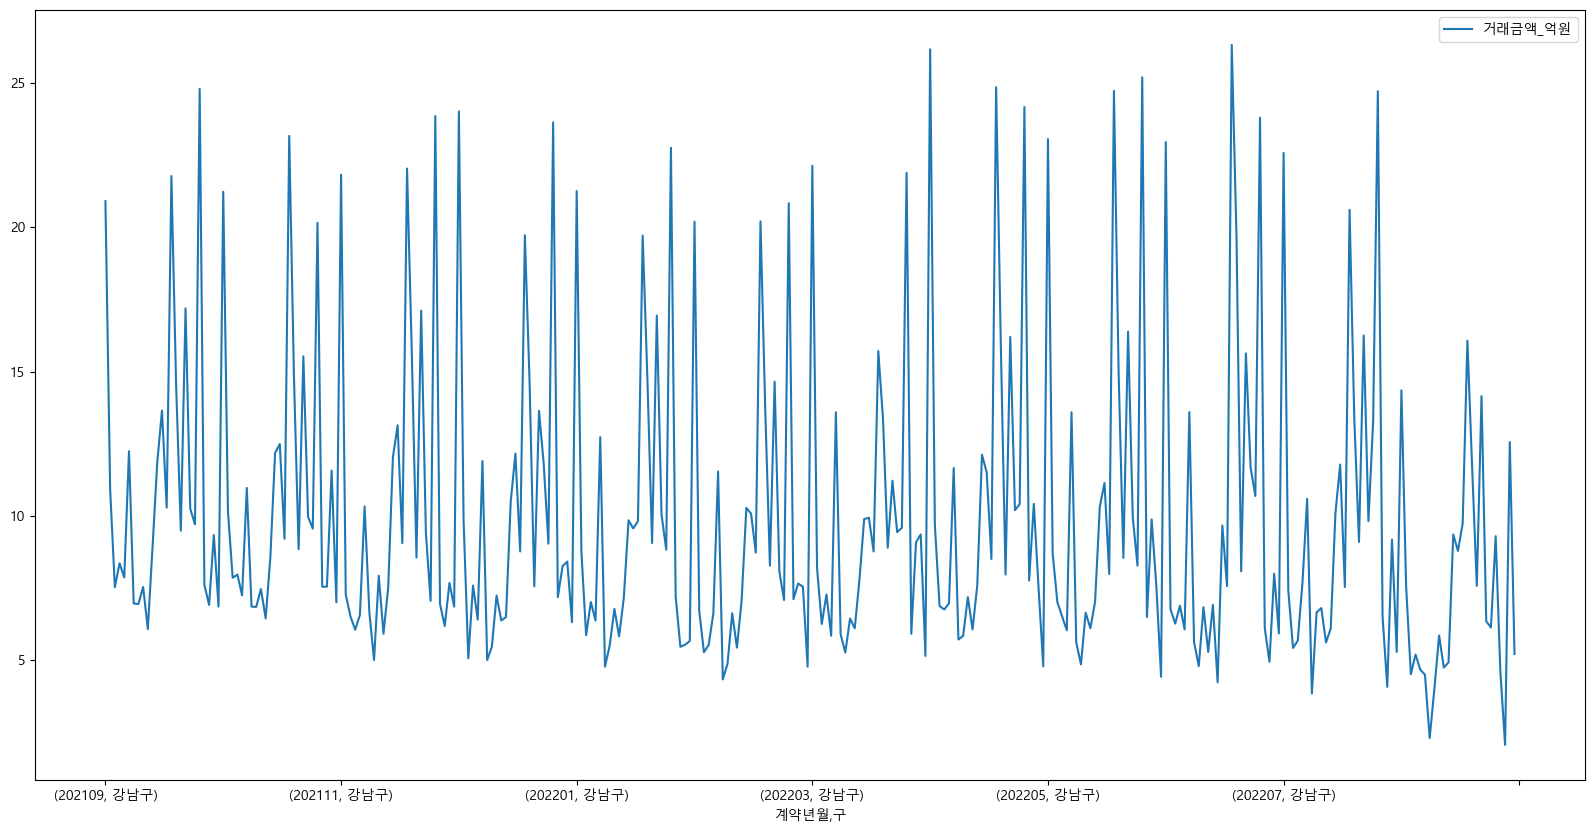

In [45]:
round(apt_price.groupby(["계약년월",'구'])[['거래금액_억원']].mean(),2).plot(figsize=(20,10))

## 구별 거래취소건수

In [31]:
년월_거래취소= apt_price.groupby("계약년월")[['해제사유발생일']].count()
년월_거래취소

,해제사유발생일
계약년월,
202109,110
202110,96
202111,83
202112,46
202201,38
202202,29
202203,61
202204,69
202205,75


<AxesSubplot:xlabel='계약년월', ylabel='해제사유발생일'>

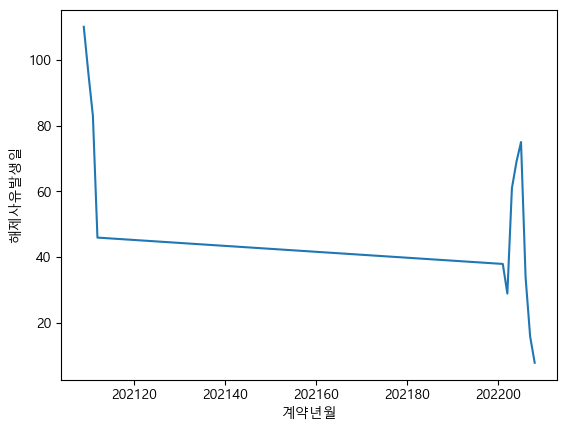

In [33]:
sns.lineplot(x=년월_거래취소.index,y=년월_거래취소['해제사유발생일'],data=년월_거래취소)

In [46]:
구별_거래취소=apt_price.groupby("구")[['해제사유발생일']].count().sort_values(by='해제사유발생일',ascending=False)
구별_거래취소

,해제사유발생일
구,
서초구,68
노원구,54
강남구,46
구로구,41
송파구,40
동대문구,40
강동구,34
영등포구,30
관악구,30


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

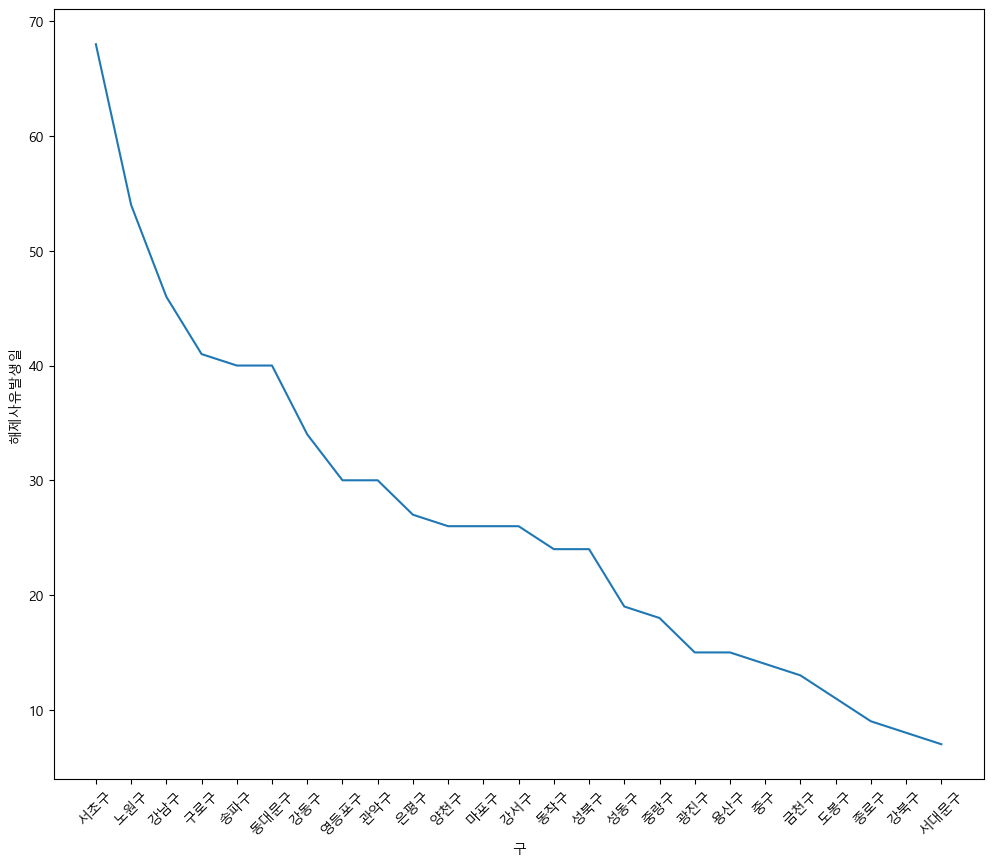

In [51]:
plt.figure(figsize=(12,10))
sns.lineplot(x=구별_거래취소.index,y=구별_거래취소['해제사유발생일'],data=구별_거래취소)
plt.xticks(rotation=45)

## 결측치 처리

In [83]:
apt_price.isnull().sum()

시군구             0
번지              4
단지명             0
전용면적(㎡)         0
계약년월            0
계약일             0
거래금액(만원)        0
층               0
건축년도            2
도로명             0
해제사유발생일     16282
거래유형            0
중개사소재지          0
구               0
동               0
평               0
거래금액_억원         0
계약년             0
계약월             0
평형              0
요일              0
dtype: int64

In [86]:
apt_price['건축년도'].fillna(2021,inplace=True)

In [92]:
apt_price['번지'].fillna(384,inplace=True)